<a href="https://colab.research.google.com/github/JHyunjun/SNU/blob/main/Image%20Fourier%20Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fourier tranformation**
In this notebook, we will see how to use various packages related to Fourier transform. Fourier Transform is used to analyze the frequency characteristics of various filters. For images, 2D Discrete Fourier Transform (DFT) is used to find the frequency domain. A fast algorithm called Fast Fourier Transform (FFT) is used for calculation of DFT.


In [74]:
import numpy as np
import scipy as sp
import scipy.fftpack
import cv2

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
!wget -O messi.jpg "https://drive.google.com/u/1/uc?id=1QM5K4mwYGuB9d3zvx8LN8V-leJGEXNYH&export=download"

--2022-08-04 06:27:48--  https://drive.google.com/u/1/uc?id=1QM5K4mwYGuB9d3zvx8LN8V-leJGEXNYH&export=download
Resolving drive.google.com (drive.google.com)... 173.194.210.100, 173.194.210.102, 173.194.210.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1QM5K4mwYGuB9d3zvx8LN8V-leJGEXNYH&export=download [following]
--2022-08-04 06:27:48--  https://drive.google.com/uc?id=1QM5K4mwYGuB9d3zvx8LN8V-leJGEXNYH&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5gfi2vtjjcqv4cl67nfcvla338jjjivq/1659594450000/03995330158540788625/*/1QM5K4mwYGuB9d3zvx8LN8V-leJGEXNYH?e=download&uuid=1a3d4073-c926-41af-8111-ce8a806990be [following]
--2022-08-04 06:27:49--  https://doc-0c-bc-docs.googleuserconten

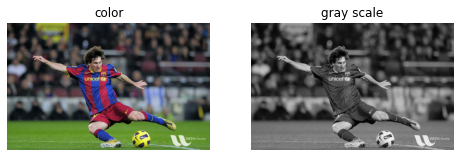

In [76]:
color = Image.open('messi.jpg')  # open file
gray = color.convert('L')  # convert to gray scale

img = np.asarray(gray)  # convert to numpy array

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1); plt.title('color'); plt.imshow(color); plt.axis('off')
plt.subplot(1, 2, 2); plt.title('gray scale'); plt.imshow(gray, cmap='gray'); plt.axis('off')  # note that, there's a cmap in the imshow function.
plt.show()

In [77]:
# print shape of images
print('shape of color img array (H, W, C): {}'.format(np.asarray(color).shape))
print('shape of gray scale img array (H, W): {}'.format(np.asarray(gray).shape))

shape of color img array (H, W, C): (342, 548, 3)
shape of gray scale img array (H, W): (342, 548)


### **Fourier Transform in Numpy**

Numpy has an FFT package. `np.fft.fft2()`

- `input`: gray scale input image
- `output`: complex ndarray



In [78]:
# apply fft2 function to Iamge
f = np.fft.fft2(img)
print(img.shape)
print(f.shape)

(342, 548)
(342, 548)


Now once you got the result, zero frequency component will be at top left corner. If you want to bring it to center, you need to shift the result by $\frac{N}{2}$ in both the directions. This is simply done by the function, `np.fft.fftshift()`. (It is more easier to analyze). 

In [79]:
# apply fftshift function to f
fshift = np.fft.fftshift(f)

Once you found the frequency transform, you can find the magnitude spectrum.

In [80]:
# get magnitude spectrum from the above result
magnitude_spectrum = 20 * np.log(np.abs(fshift))

Let's see what happened. You can see more whiter region at the center showing low frequency content is more.

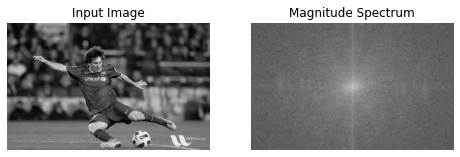

In [81]:
# Plot gray scale input image & its magnitude spectrum image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.title('Input Image'); plt.imshow(img, cmap='gray'); plt.axis('off')
plt.subplot(1, 2, 2); plt.title('Magnitude Spectrum'); plt.imshow(magnitude_spectrum, cmap='gray'); plt.axis('off')
plt.show()

Now we can do some operations in frequency domain, like high pass filtering and reconstruct the image. For that simply remove the low frequencies by masking with a rectangular window of size 60x60. Then apply the inverse shift using `np.fft.ifftshift()` so that DC component again come at the top-left corner. Then find inverse FFT using `np.ifft2()` function. The result, again, will be a complex number. You can take its absolute value.

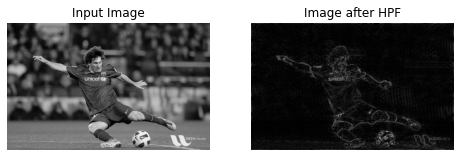

In [82]:
# remove the low frequencies by masking fourier transformed image with a square window of size 60
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
# apply inverse shift
f_ishift = np.fft.ifftshift(fshift)
# call the inverse fourier transform function
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# plot results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(img, cmap = 'gray')
plt.title('Input Image'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_back, cmap='gray')
plt.title('Image after HPF'); plt.axis('off')

plt.show()

The result shows High Pass Filtering is an edge detection operation!! This also shows that most of the image data is present in the Low frequency region of the spectrum.

# **Fourier Transform in OpenCV**
cv2 has an FFT functions. `cv2.dft()` and `cv2.idft()`

`cv2.dft()`
- `input`: \\
src = gray scale input image with dtype float \\
flags = operation mode (In most cases, we will use `DFT_COMPLEX_OUTPUT`)
- `output`: 2 channel ndarray (real, imaginary parts)

Flag options:

If `DFT_ROWS` is set or the input array has a single row or single column, the function performs a 1D forward or inverse transform of each row of a matrix when `DFT_ROWS` is set. Otherwise, it performs a 2D transform.

If the input array is real and `DFT_INVERSE` is not set, the function performs a forward 1D or 2D transform:
When `DFT_COMPLEX_OUTPUT` is set, the output is a complex matrix of the same size as input.

When `DFT_COMPLEX_OUTPUT` is not set, the output is a real matrix of the same size as input. In case of 2D transform, it uses the packed format as shown above. In case of a single 1D transform, it looks like the first row of the matrix above. In case of multiple 1D transforms (when using the `DFT_ROWS` flag), each row of the output matrix looks like the first row of the matrix above.

If the input array is complex and either `DFT_INVERSE` or `DFT_REAL_OUTPUT` are not set, the output is a complex array of the same size as input. The function performs a forward or inverse 1D or 2D transform of the whole input array or each row of the input array independently, depending on the flags `DFT_INVERSE` and `DFT_ROWS`.

When `DFT_INVERS` is set and the input array is real, or it is complex but `DFT_REAL_OUTPUT` is set, the output is a real array of the same size as input. The function performs a 1D or 2D inverse transformation of the whole input array or each individual row, depending on the flags `DFT_INVERSE` and `DFT_ROWS`.

To get a magnitude spectrum image, try `cv2.magnitude()` functions.
`cv2.magnitude()` \\
- `input`: array containing real value, array containing complex value
  - flags: cv2.DFT_COMPLEX_OUTPUT
- `output`: magnitude image

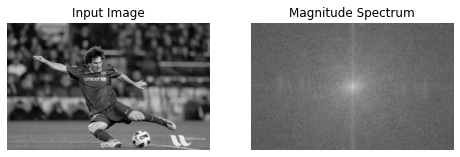

In [83]:
# call the fourier transform provided by opencv. 
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
# make zero frequency component be at the center of the array.
dft_shift = np.fft.fftshift(dft)

# get magnitude of the array using the function provided by opencv.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# plot results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray')
plt.title('Input Image'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'); plt.axis('off')
plt.show()

This time we will see how to remove high frequency contents in the image. It actually blurs the image. For this, we create a **60x60 mask** first with high value 1 at low frequencies, and 0 at HF region.



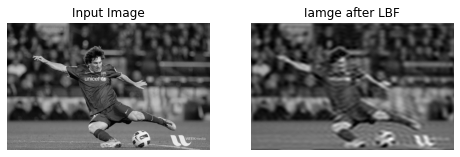

In [84]:
# create a mask whose components are 1 near low frequencies and 0 for others
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
mask = np.zeros((rows, cols,2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# plot results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray')
plt.title('Input Image'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_back, cmap='gray')
plt.title('Iamge after LPF'); plt.axis('off')
plt.show()

As usual, **OpenCV** functions cv2.dft() and cv2.idft() **are faster than Numpy** counterparts. But Numpy functions are more user-friendly. 

Performance of DFT calculation is better for some array size. It is fastest when array size is power of two. The arrays whose size is a product of 2’s, 3’s, and 5’s are also processed quite efficiently. So if you are worried about the performance of your code, you can modify the size of the array to any optimal size (by padding zeros) before finding DFT. For OpenCV, you have to manually pad zeros. But for Numpy, you specify the new size of FFT calculation, and it will automatically pad zeros for you.

So how do we find this optimal size? OpenCV provides a function, `cv2.getOptimalDFTSize()` for this.

In [85]:
rows, cols = img.shape
print('org img size (H, W): ({}, {})'.format(rows, cols))

nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
print('Recommended size (H, W): ({}, {})'.format(nrows, ncols))

org img size (H, W): (342, 548)
Recommended size (H, W): (360, 576)


There are lots of ways to pad images. One way is using numpy. It is simple and easy to remember.

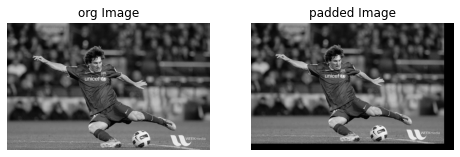

In [86]:
# 이미지를 늘리고 좌측상단부터 이미지를 채우는
rows, cols = img.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)

nimg = np.zeros((nrows, ncols))
nimg[:rows, :cols] = img

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray'); 
plt.title('org Image'); plt.axis('off');
plt.subplot(1, 2, 2); plt.imshow(nimg, cmap='gray'); 
plt.title('padded Image'); plt.axis('off');
plt.show()

Another way is using opencv. cv2 provides very convinient `copyMakeBorder` functions for padding a image.

`cv2.copyMakeBorder()`
- `input`:
 - `img`: input image \\
 - `top`: border width in number of pixels in top direction. \\
 - `bottom`: border width in number of pixels in bottom direction. \\
 - `left`: border width in number of pixels in left direction. \\
 - `right`: border width in number of pixels in right direction. \\
 - `borderType`: It is defined by flags like `cv2.BORDER_CONSTANT`, `cv2.BORDER_REFLECT`, etc
 - `value`: It is an optional parameter which depicts color of border if border type is cv2.BORDER_CONSTANT. 

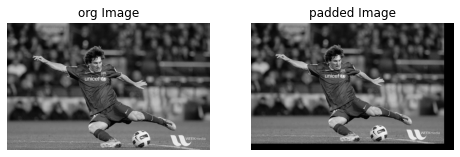

In [87]:
rows, cols = img.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)

right = ncols - cols
bottom = nrows - rows
nimg = cv2.copyMakeBorder(img, 0, bottom, 0, right, cv2.BORDER_CONSTANT, value=0)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray'); 
plt.title('org Image'); plt.axis('off');
plt.subplot(1, 2, 2); plt.imshow(nimg, cmap='gray'); 
plt.title('padded Image'); plt.axis('off');
plt.show()

Note that, in general, zero padding means extending 0 value to each sides of an image. But in this tutorial, padding like above is just ok becuase the purpose of padding an image is for efficient calculation.

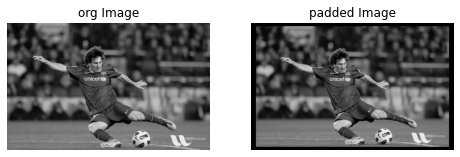

In [88]:
rows, cols = img.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)

horizon = ncols - cols
vertical = nrows - rows

# Pad the img so that its content is in the center of the padded image
bottom = vertical // 2
top = vertical - bottom
left = horizon // 2
right = horizon - left

nimg = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray'); 
plt.title('org Image'); plt.axis('off');
plt.subplot(1, 2, 2); plt.imshow(nimg, cmap='gray'); 
plt.title('padded Image'); plt.axis('off');
plt.show()

Let's see what happend when we choose another option for `cv2.copyMakeBorder`. 

Try `cv2.BORDER_REFLECT`!!


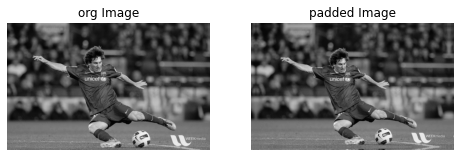

In [89]:
horizon = ncols - cols
vertical = nrows - rows

bottom = vertical // 2
top = vertical - bottom
left = horizon // 2
right = horizon - left

# try cv2.BORDER_REFLECT OPTION
nimg = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REFLECT, value=0)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray'); 
plt.title('org Image'); plt.axis('off');
plt.subplot(1, 2, 2); plt.imshow(nimg, cmap='gray'); 
plt.title('padded Image'); plt.axis('off');
plt.show()

Let’s check their performance using IPython magic command `%timeit`.

In [90]:
%timeit fft1 = np.fft.fft2(img)

100 loops, best of 5: 14.6 ms per loop


In [91]:
%timeit fft2 = np.fft.fft2(img, [nrows,ncols])

100 loops, best of 5: 6.5 ms per loop


If the image is resized with appropriate shape, we can enjoy 3x speed up!

Let's try the same with OpenCV functions.

In [92]:
%timeit dft1 = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

100 loops, best of 5: 2.97 ms per loop


In [93]:
%timeit dft2 = cv2.dft(np.float32(nimg),flags=cv2.DFT_COMPLEX_OUTPUT)

1000 loops, best of 5: 1.55 ms per loop


**It also shows a 4x speed-up. You can also see that OpenCV functions are around 2x faster than Numpy functions!!**

You may think 7 ms and 3 ms is not a big deal and using complicated packages and padding image seems unnecessary. However, the `meesi.jpg` image is quite small and in real world life, we should deal with large scale high resolution images!

Let's take a look at `nevertheless.jpg` image with the size of (1280, 894), note that size of `messi.jpg` was (342, 548)

In [94]:
!wget -O nevertheless.jpg 'https://fs.jtbc.joins.com/prog/drama/nevertheless/Img/site/ProgInfo/202106070449226978.jpg'

--2022-08-04 06:28:18--  https://fs.jtbc.joins.com/prog/drama/nevertheless/Img/site/ProgInfo/202106070449226978.jpg
Resolving fs.jtbc.joins.com (fs.jtbc.joins.com)... 222.239.21.162, 222.239.21.160
Connecting to fs.jtbc.joins.com (fs.jtbc.joins.com)|222.239.21.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 442521 (432K) [image/jpeg]
Saving to: ‘nevertheless.jpg’

nevertheless.jpg    100%[===================>] 432.15K   535KB/s    in 0.8s    

2022-08-04 06:28:21 (535 KB/s) - ‘nevertheless.jpg’ saved [442521/442521]



img shape: (H, W): (648, 904)


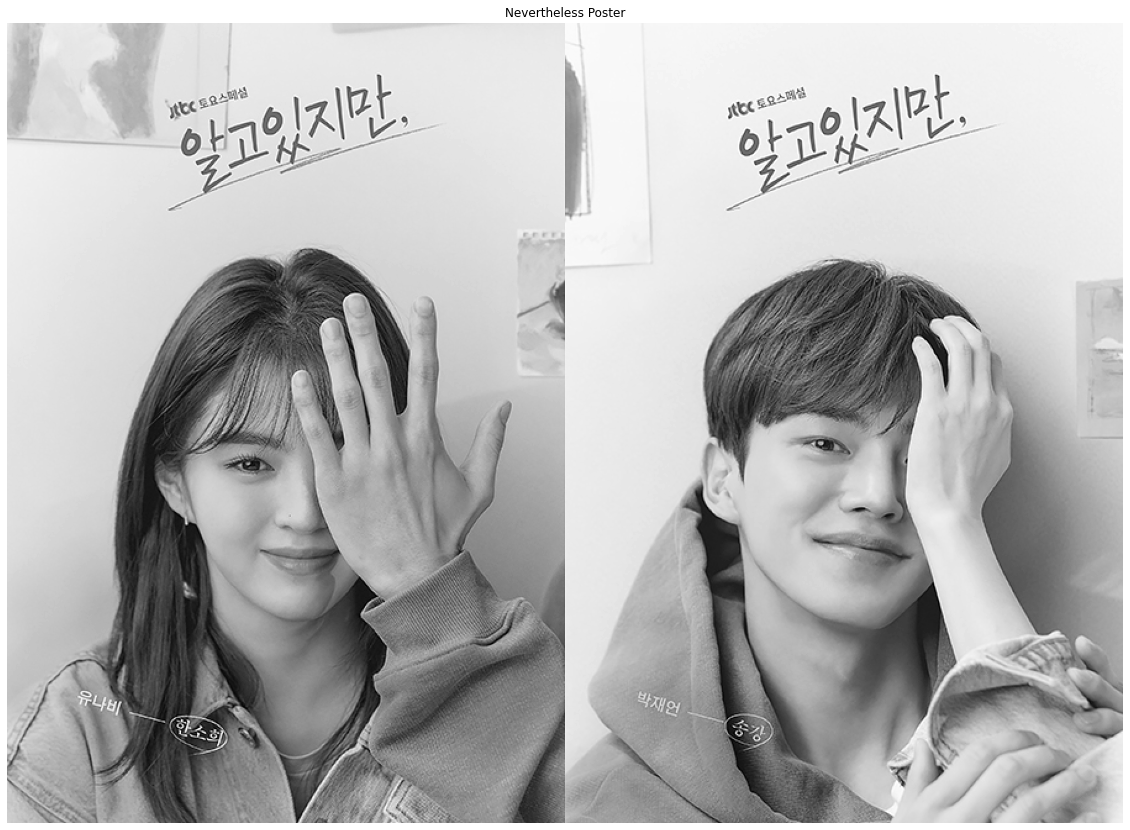

In [95]:
img = Image.open('nevertheless.jpg')
img = img.convert('L')
img = np.asarray(img)

print('img shape: (H, W): ({}, {})'.format(img.shape[0], img.shape[1]))
plt.figure(figsize=(20, 60))
plt.imshow(img, cmap='gray')
plt.title("Nevertheless Poster")
plt.axis('off')
plt.show()

In [96]:
rows, cols = img.shape
print('org img size (H, W): ({}, {})'.format(rows, cols))

nrows, ncols = cv2.getOptimalDFTSize(rows), cv2.getOptimalDFTSize(cols)
print('recommended img size (H, W): ({}, {})'.format(nrows, ncols))

org img size (H, W): (648, 904)
recommended img size (H, W): (648, 960)


In [97]:
# check execution time of numpy fft function
%timeit fft1 = np.fft.fft2(img)

10 loops, best of 5: 34.5 ms per loop


In [98]:
# check execution time of numpy fft function with padding
%timeit fft2 = np.fft.fft2(img,[nrows,ncols])

100 loops, best of 5: 17.7 ms per loop


In [99]:
# check execution time of opencv fft function
%timeit df2 = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

100 loops, best of 5: 10.9 ms per loop


In [100]:
# pad the image using the functions provided by opencv
rows, cols = img.shape
nrows, ncols = cv2.getOptimalDFTSize(rows), cv2.getOptimalDFTSize(cols)
horizon, vertical = ncols - cols, nrows - rows
bottom = vertical // 2; top = vertical - bottom
left = horizon // 2; right = horizon - left
nimg = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, 0)

# print shape of the padded image
print('nimg shape: (H, W): ({}, {})'.format(nimg.shape[0], nimg.shape[1]))

nimg shape: (H, W): (648, 960)


In [101]:
# check execution time of opencv fft function with the padded image
%timeit df2 = cv2.dft(np.float32(nimg), flags=cv2.DFT_COMPLEX_OUTPUT)

100 loops, best of 5: 5.2 ms per loop


If there are millions of images to be pre-processed using fourier transform, it is definitely better to use opencv packages to save time.

OK, we now know that applying fft on padded image is much faster than fft on original image. Then, how can we reconstruct original image after some operations in frequency domain which is the result of padded image?

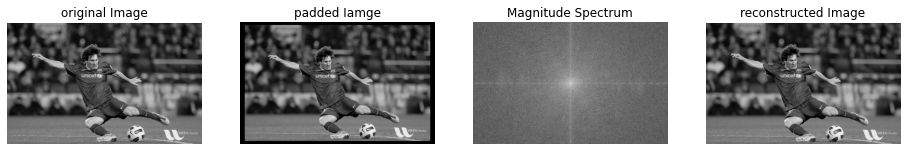

In [102]:
color = Image.open('messi.jpg')  # open file
gray = color.convert('L')  # convert to gray scale
img = np.asarray(gray)  # convert to numpy array

# pad image for fast fourier transform
rows, cols = img.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)

horizon, vertical = ncols - cols, nrows - rows
bottom = vertical // 2; top = vertical - bottom
left = horizon // 2; right = horizon - left

nimg = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, 0)

# apply fourier transform to the padded image
dft= cv2.dft(np.float32(nimg), flags=cv2.DFT_COMPLEX_OUTPUT)
# obtain the magnitude of the image in frequency domain
dft_shift = np.fft.fftshift(dft)
magnitude = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# apply inverse fourier transform to turn back into image
idft_shift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(idft_shift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# crop image so that its size is same with the one before padding.
img_back = img_back[top:-bottom, left:-right]

# print shape of the result & plot images
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1); plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('original Image')
plt.subplot(1, 4, 2); plt.imshow(nimg, cmap='gray'); plt.axis('off'); plt.title('padded Iamge')
plt.subplot(1, 4, 3); plt.imshow(magnitude, cmap='gray'); plt.axis('off'); plt.title('Magnitude Spectrum')
plt.subplot(1, 4, 4); plt.imshow(img_back, cmap='gray'); plt.axis('off'); plt.title('reconstructed Image')
plt.show()

# **Fourier Transform in SciPy**
SciPy is a Python-based ecosystem of open-source software for mathematics, science, and engineering.
It has an FFT packages. `scipy.fftpack`

`scipy.fftpack.fft2()`
- `input`: gray scale input image with dtype float
- `output`: complex ndarray

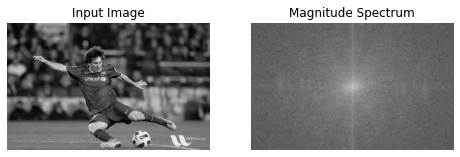

In [103]:
dft = sp.fftpack.fft2(img)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(np.abs(dft_shift))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray')
plt.title('Input Image'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'); plt.axis('off')
plt.show()

In [104]:
# check executaion time of sp.fftpack.fft2 function
%timeit dft3 = sp.fftpack.fft2(img)

100 loops, best of 5: 7.16 ms per loop


In [105]:
# check executaion time of sp.fftpack.fft2 function when padded image is applied
%timeit dft3 = sp.fftpack.fft2(nimg)

100 loops, best of 5: 3.37 ms per loop


---

# **Practice: Denoising using FFT**

Denoise the below image by using FFT

1. choose one of the packages providing fft related functions
2. transform the image to frequency domain
3. box filtering
4. tranform frequency domain array back to the image
5. plot the result

In [106]:
!wget -O moon_landing.png https://i.imgur.com/MHcHVmX.png

--2022-08-04 06:28:52--  https://i.imgur.com/MHcHVmX.png
Resolving i.imgur.com (i.imgur.com)... 146.75.28.193
Connecting to i.imgur.com (i.imgur.com)|146.75.28.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216481 (211K) [image/png]
Saving to: ‘moon_landing.png’

moon_landing.png    100%[===================>] 211.41K  --.-KB/s    in 0.08s   

2022-08-04 06:28:52 (2.59 MB/s) - ‘moon_landing.png’ saved [216481/216481]



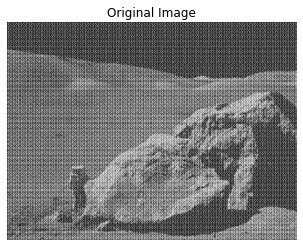

In [107]:
img = Image.open('moon_landing.png')

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


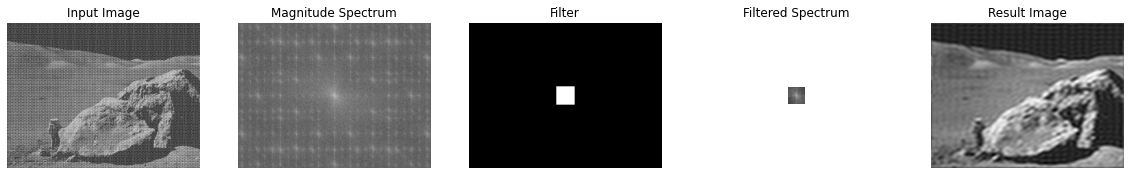

In [108]:
# fourier transform
dft = sp.fftpack.fft2(img)
dft = np.fft.fftshift(dft)
magnitude = 20*np.log(np.abs(dft))

# low pass filter
crows, ccols = dft.shape[0] // 2, dft.shape[1] // 2
filter = np.zeros(dft.shape, np.uint8)
filter[crows - 30:crows + 30, ccols - 30: ccols + 30] = 1

# filtering & turn back to image
res_dft = dft * filter
res_magnitude = 20*np.log(np.abs(res_dft))
res = np.fft.ifftshift(res_dft)
res = sp.fftpack.ifft2(res)

plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1); plt.title('Input Image'); plt.imshow(img, cmap='gray'); plt.axis('off')
plt.subplot(1, 5, 2); plt.title('Magnitude Spectrum'); plt.imshow(magnitude, cmap='gray'); plt.axis('off')
plt.subplot(1, 5, 3); plt.title('Filter'); plt.imshow(filter, cmap='gray'); plt.axis('off')
plt.subplot(1, 5, 4); plt.title('Filtered Spectrum'); plt.imshow(res_magnitude, cmap='gray'); plt.axis('off')
plt.subplot(1, 5, 5); plt.title('Result Image'); plt.imshow(np.abs(res), cmap='gray'); plt.axis('off')
plt.show()

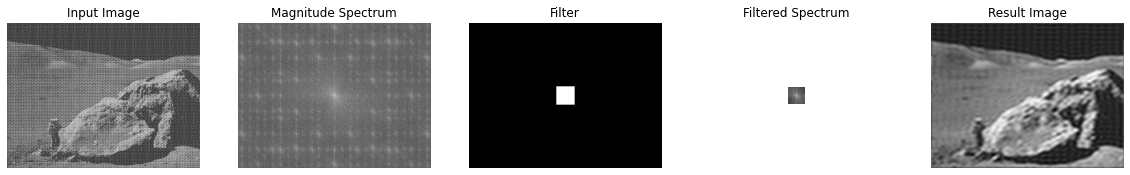

---

# **Extra Practice: Edge detection using FFT**

1. choose one of the packages providing fft related functions
2. transform the image to frequency domain
3. box filtering
4. tranform frequency domain array back to the image
5. plot the result

In [109]:
img = Image.open('nevertheless.jpg')
img = img.convert('L')
img = np.asarray(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


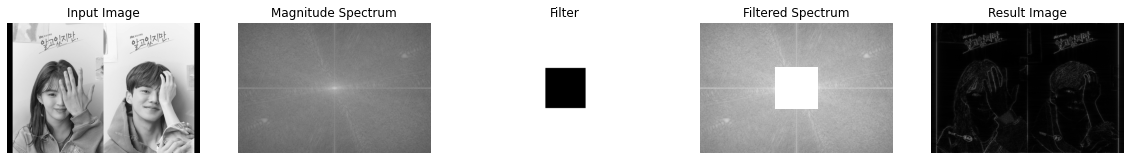

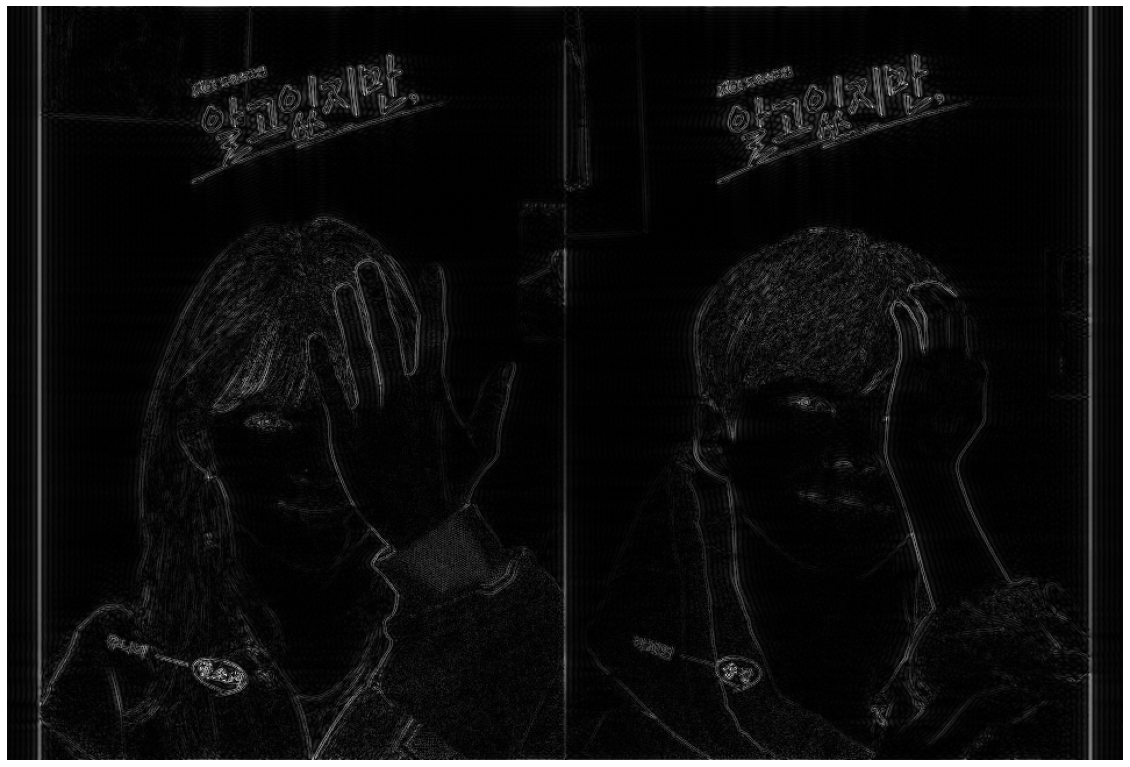

In [110]:
# get optimal size of startup images for fft
rows, cols = img.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)

# pad image
horizon, vertical = ncols - cols, nrows - rows
bottom = vertical // 2; top = vertical - bottom
left = horizon // 2; right = horizon - left

nimg = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, 0)

# transform image to frequency domain
dft = sp.fftpack.fft2(nimg)
dft = np.fft.fftshift(dft)
magnitude = 20*np.log(np.abs(dft))

# box filtering
crows, ccols = dft.shape[0] // 2, dft.shape[1] // 2
filter = np.ones(dft.shape, np.uint8)
filter[crows - 100:crows + 100, ccols - 100: ccols + 100] = 0

res_dft = dft * filter
res_magnitude = 20*np.log(np.abs(res_dft))

# transform frequency domain to image
res = np.fft.ifftshift(res_dft)
res = sp.fftpack.ifft2(res)
res = np.abs(res)

# plt input image, magnitude spectrum, filter, filtered spectrum, result image
plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1); plt.title('Input Image'); plt.imshow(nimg, cmap='gray'); plt.axis('off')
plt.subplot(1, 5, 2); plt.title('Magnitude Spectrum'); plt.imshow(magnitude, cmap='gray'); plt.axis('off')
plt.subplot(1, 5, 3); plt.title('Filter'); plt.imshow(filter, cmap='gray'); plt.axis('off')
plt.subplot(1, 5, 4); plt.title('Filtered Spectrum'); plt.imshow(res_magnitude, cmap='gray'); plt.axis('off')
plt.subplot(1, 5, 5); plt.title('Result Image'); plt.imshow(res, cmap='gray'); plt.axis('off')
plt.show()

# plot result image with fig size (20,60)
plt.figure(figsize=(20, 60))
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()
